In [151]:
# 🔹 Step 1: Import Libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [152]:
# 🔹 Step 2: Load Original Dataset
df = pd.read_csv("data/salaries.csv")
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [153]:
df.info

<bound method DataFrame.info of      FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION  \
0        TOMASA       ARMEN   F   5-18-2014   01-07-2016         Analyst   
1         ANNIE         NaN   F         NaN   01-07-2016       Associate   
2         OLIVE        ANCY   F   7-28-2014   01-07-2016         Analyst   
3        CHERRY     AQUILAR   F  04-03-2013   01-07-2016         Analyst   
4          LEON  ABOULAHOUD   M  11-20-2014   01-07-2016         Analyst   
...         ...         ...  ..         ...          ...             ...   
2634  KATHERINE      ALSDON   F   6-28-2011   01-07-2016  Senior Manager   
2635     LOUISE     ALTARAS   F   1-14-2014   01-07-2016         Analyst   
2636      RENEE      ALVINO   F   1-23-2014   01-07-2016         Analyst   
2637       TERI   ANASTASIO   F   3-17-2014   01-07-2016         Analyst   
2638    GREGORY      ABARCA   M   9-18-2014   01-07-2016         Analyst   

       AGE  SALARY        UNIT  LEAVES USED  LEAVES REM

In [154]:
# 🔹 Step 3: Rename and Keep Required Columns
df = df.rename(columns={
    'PAST EXP': 'YearsExperience',
    'DESIGNATION': 'Department',
    'SALARY': 'Salary',
    'RATINGS': 'Ratings'
})

df = df[[
    'YearsExperience', 'Department', 'Salary', 'Ratings'
]]


In [155]:
# 🔹 Step 4: Add Mock Columns for Enhancement

# Add mock company names
companies = ['TCS', 'Infosys', 'Microsoft', 'Google', 'Amazon', 'Accenture', 'Wipro', 'IBM']
df['Company Name'] = np.random.choice(companies, size=len(df))

# Add mock locations
locations = ['Bangalore', 'Mumbai', 'Pune', 'Hyderabad', 'Delhi', 'Chennai', 'Remote', 'USA']
df['Location'] = np.random.choice(locations, size=len(df))

# Add mock education levels
education_levels = ["Bachelor's", "Master's", "PhD"]
df['Education Level'] = np.random.choice(education_levels, size=len(df), p=[0.6, 0.3, 0.1])

# Add mock job levels
job_levels = ['Junior', 'Mid', 'Senior']
df['Job Level'] = np.random.choice(job_levels, size=len(df), p=[0.5, 0.3, 0.2])

# Add work mode
modes = ['Remote', 'Onsite', 'Hybrid']
df['Work Mode'] = np.random.choice(modes, size=len(df))

# Add years in company
df['Years in Company'] = np.round(np.random.uniform(0.5, 10.0, size=len(df)), 1)

# Add company rating
df['Company Rating'] = np.round(np.random.uniform(2.5, 5.0, size=len(df)), 1)


In [156]:
df.head()

,YearsExperience,Department,Salary,Ratings,Company Name,Location,Education Level,Job Level,Work Mode,Years in Company,Company Rating
0,0,Analyst,44570,2.0,TCS,USA,Bachelor's,Junior,Hybrid,4.4,3.8
1,7,Associate,89207,NaN,Google,Chennai,Master's,Junior,Onsite,2.7,2.7
2,0,Analyst,40955,3.0,TCS,Remote,Bachelor's,Senior,Remote,8.0,2.7
3,0,Analyst,45550,3.0,Infosys,USA,Bachelor's,Junior,Onsite,1.0,2.7
4,3,Analyst,43161,NaN,Microsoft,Remote,PhD,Junior,Remote,3.8,4.8


In [157]:
# 🔹 Step 5: Clean and Validate Data

# Drop missing values
df.dropna(subset=[
    'YearsExperience', 'Department', 'Salary', 'Ratings',
    'Company Name', 'Location', 'Education Level', 'Job Level',
    'Work Mode', 'Years in Company', 'Company Rating'
], inplace=True)

# Convert numeric columns
df['YearsExperience'] = pd.to_numeric(df['YearsExperience'], errors='coerce')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Years in Company'] = pd.to_numeric(df['Years in Company'], errors='coerce')
df['Company Rating'] = pd.to_numeric(df['Company Rating'], errors='coerce')

# Remove invalid or outlier rows
df = df[
    (df['YearsExperience'] >= 0) &
    (df['Salary'] > 0) &
    (df['Ratings'] >= 0) &
    (df['Company Rating'] >= 0)
]

df.reset_index(drop=True, inplace=True)
df.head()


,YearsExperience,Department,Salary,Ratings,Company Name,Location,Education Level,Job Level,Work Mode,Years in Company,Company Rating
0,0,Analyst,44570,2.0,TCS,USA,Bachelor's,Junior,Hybrid,4.4,3.8
1,0,Analyst,40955,3.0,TCS,Remote,Bachelor's,Senior,Remote,8.0,2.7
2,0,Analyst,45550,3.0,Infosys,USA,Bachelor's,Junior,Onsite,1.0,2.7
3,0,Analyst,48736,4.0,IBM,Hyderabad,Bachelor's,Junior,Hybrid,5.9,2.5
4,0,Analyst,40339,5.0,Wipro,Hyderabad,Bachelor's,Senior,Remote,1.1,4.5


In [158]:
# 🔹 Step 6: Define Features & Target
X = df[[
    'YearsExperience', 'Department', 'Ratings', 'Company Name',
    'Location', 'Education Level', 'Job Level', 'Work Mode',
    'Years in Company', 'Company Rating'
]]
y = df['Salary']


In [159]:
# 🔹 Step 7: One-Hot Encode Categorical Features
categorical_cols = ['Department', 'Company Name', 'Location', 'Education Level', 'Job Level', 'Work Mode']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_cols])

# Combine with numeric features
X_num = X[['YearsExperience', 'Ratings', 'Years in Company', 'Company Rating']].values
X_final = np.concatenate([X_num, X_cat], axis=1)


In [160]:
# 🔹 Step 8: Train Model (Random Forest)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)
model.fit(X_train, y_train)


,n_estimators,150
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [161]:
# 🔹 Step 9: Evaluate Model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"✅ Train R² Score: {train_score:.4f}")
print(f"✅ Test R² Score: {test_score:.4f}")


✅ Train R² Score: 0.9903
✅ Test R² Score: 0.9633


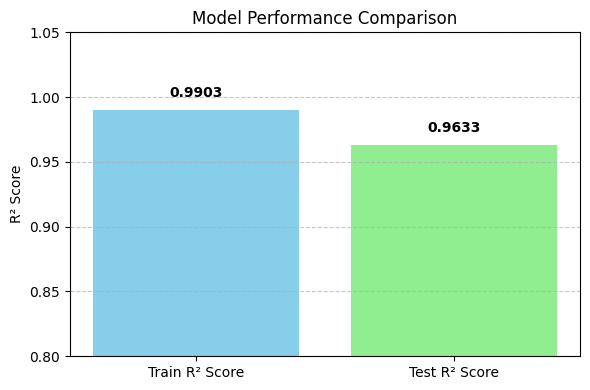

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['Train R² Score', 'Test R² Score'], [train_score, test_score], color=['skyblue', 'lightgreen'])
plt.ylim(0.8, 1.05)
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate([train_score, test_score]):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

In [163]:
# 🔹 Step 10: Save Model & Encoder
with open("model.pkl", "wb") as f:
    pickle.dump((model, encoder), f)

print("📦 Model & encoder saved as model.pkl")


📦 Model & encoder saved as model.pkl
